# Multiclass Image classification using VGG16

In [1]:
# Necessary module import 
import numpy as np
import os
import time
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model, Sequential
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras.applications import vgg16
from keras import backend as K
import cv2

Using TensorFlow backend.
C:\python\envs\myWindowsCV\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
              # image processing
import numpy as np         # mathematical operations
import os                  # working with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm 

In [4]:
IMG_SIZE = 100# our images are 100x100x3

In [5]:
#Image label
def label_img(word_label):
    if word_label == 'Scrath_Mark': return [1,0,0,0,0,0]
    elif word_label == 'Slot_Damage': return [0,1,0,0,0,0]
    elif word_label == 'Thinning': return [0,0,1,0,0,0]
    elif word_label == 'Wrinkle': return [0,0,0,1,0,0]
    elif word_label == 'OK_back': return [0,0,0,0,1,0]
    elif word_label == 'OK_front': return [0,0,0,0,0,1]


# Dataset has 6 classes. Each class is stored in different folders

In [6]:
#Reading Data
def create_train_data(TRAIN_DIR, word_label):
    training_data = []
    for filename in os.listdir(TRAIN_DIR):
        img = cv2.imread(os.path.join(TRAIN_DIR,filename))
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        label = label_img(word_label)
        training_data.append([np.array(img),np.array(label)])
    return (training_data, label )

In [7]:
TRAIN_DIR = 'C:\\Users\\navne\\All_61326\\train_61326\\61326 Scratch Mark'
word_label = 'Scrath_Mark'
training_data_Scrath_Mark, label_Scrath_Mark = create_train_data(TRAIN_DIR, word_label)

A sample from "Scratch_Mark"  class 

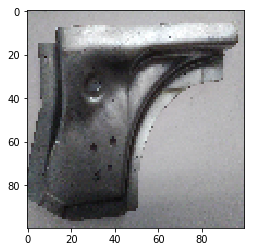

In [8]:
plt.imshow(np.array(training_data_Scrath_Mark[18][0]))

In [9]:
TRAIN_DIR = 'C:\\Users\\navne\\All_61326\\train_61326\\61326 Slot Damage'
word_label = 'Slot_Damage'
training_data_Slot_Damage, label_Slot_Damage = create_train_data(TRAIN_DIR, word_label)

A sample from "Slot_Damage" class

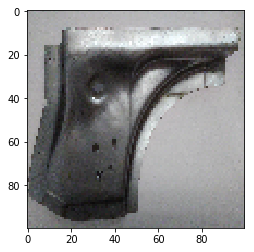

In [10]:
plt.imshow(np.array(training_data_Slot_Damage[10][0]))

In [11]:
TRAIN_DIR = 'C:\\Users\\navne\\All_61326\\train_61326\\61326 Thinning'
word_label = 'Thinning'
training_data_Thinning, label_Thinning = create_train_data(TRAIN_DIR, word_label)

A sample from "Thinning" class

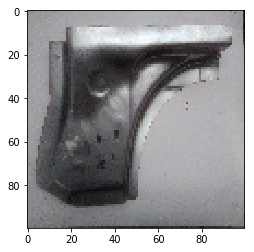

In [12]:
plt.imshow(np.array(training_data_Thinning[10][0]))

In [13]:
TRAIN_DIR = 'C:\\Users\\navne\\All_61326\\train_61326\\61326 Wrinkle'
word_label = 'Wrinkle'
training_data_Wrinkle, label_Wrinkle = create_train_data(TRAIN_DIR, word_label)

A sample from "label_Wrinkle" class

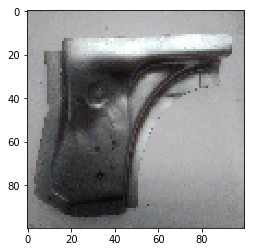

In [14]:
plt.imshow(np.array(training_data_Wrinkle[10][0]))

In [15]:
TRAIN_DIR = 'C:\\Users\\navne\\All_61326\\train_61326\\61326_0k_back'
word_label = 'OK_back'
training_data_OK_back, label_OK_back = create_train_data(TRAIN_DIR, word_label)

A sample from "OK_back" class

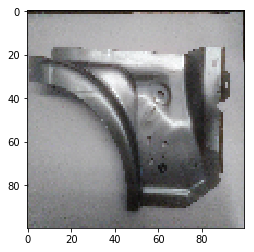

In [16]:
plt.imshow(np.array(training_data_OK_back[10][0]))

In [17]:
TRAIN_DIR = 'C:\\Users\\navne\\All_61326\\train_61326\\61326_ok_front'
word_label = 'OK_front'
training_data_OK_front, label_OK_front = create_train_data(TRAIN_DIR, word_label)

A sample from "OK_front" class

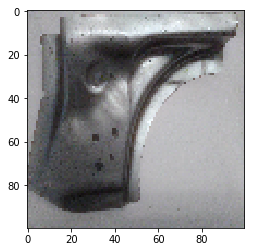

In [18]:
plt.imshow(np.array(training_data_OK_front[10][0]))

In [51]:
np.array(training_data_OK_back[10][0]).shape

(100, 100, 3)

In [52]:
Train = np.concatenate((np.array(training_data_Scrath_Mark), np.array(training_data_Slot_Damage),np.array(training_data_Thinning), np.array(training_data_Wrinkle), np.array(training_data_OK_back), np.array(training_data_OK_front)), axis=0)

In [74]:
len(Train)

217

We have in total 217 images. Also, the data set is imbalanced. 'Ok_front' and 'Ok_back' have more instances compared to other 4 classes.

In [53]:
np.random.shuffle(Train)

We shuffle the data and split it into trainig and validation set

In [54]:
train = Train[:180]
cv = Train[180:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array([i[1] for i in train])

cv_x = np.array([i[0] for i in cv]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
cv_y = np.array([i[1] for i in cv])

In [57]:
#Reading Data
def create_test_data(TRAIN_DIR):
    training_data = []
    for filename in os.listdir(TRAIN_DIR):
        img = cv2.imread(os.path.join(TRAIN_DIR,filename))
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(filename.split('.')[0])])
    return training_data

In [58]:
TEST_DIR = 'C:\\Users\\navne\\All_61326\\test_61326'
test_data= create_test_data(TEST_DIR)

In [59]:
test_x = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_x = test_x/255.0
test_y = np.array([i[1] for i in test_data])


In [60]:
print(test_y)

['OK_back' 'OK_front' 'Scrath_Mark' 'Slot_Damage' 'Thinning' 'Wrinkle']


In [79]:
def label_img_test(word_label):
    if word_label == 'Scrath_Mark': return np.argmax(np.asarray([1,0,0,0,0,0]))
    elif word_label == 'Slot_Damage': return np.argmax(np.asarray([0,1,0,0,0,0]))
    elif word_label == 'Thinning': return np.argmax(np.asarray([0,0,1,0,0,0]))
    elif word_label == 'Wrinkle': return np.argmax(np.asarray([0,0,0,1,0,0]))
    elif word_label == 'OK_back': return np.argmax(np.asarray([0,0,0,0,1,0]))
    elif word_label == 'OK_front': return np.argmax(np.asarray([0,0,0,0,0,1]))
def print_test_tag(test_y):
    test_tag = test_y
    a_list = []
    for tag in test_tag:
        ss = label_img_test(str(tag))
        a_list.append(ss)
    return a_list

I have renamed Cross-validation set to test set. 

In [62]:
X_train = X/255.
Y_train = Y
X_test = cv_x/255
Y_test = cv_y
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of CV examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 180
number of CV examples = 37
X_train shape: (180, 100, 100, 3)
Y_train shape: (180, 6)
X_test shape: (37, 100, 100, 3)
Y_test shape: (37, 6)


## Now let's start to create our model. I have downloaded VGG16 model

In [63]:
model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [64]:
transfer_layer = model.get_layer('block5_pool')

In [65]:
transfer_layer.output

<tf.Tensor 'block5_pool_1/MaxPool:0' shape=(?, 3, 3, 512) dtype=float32>

In [66]:
conv_model = Model(inputs=model.input,
                   outputs=transfer_layer.output)


In [67]:
for layer in conv_model.layers:
   layer.trainable = False

Now let's add 3 dense layer on top of VGG network

In [68]:
# Start a new Keras Sequential model.
new_model = Sequential()

# Add the convolutional part of the VGG16 model from above.
new_model.add(conv_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
new_model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# This is for combining features that the VGG16 model has
# recognized in the image.
new_model.add(Dense(1024, activation='relu'))
new_model.add(Dense(512, activation='relu'))

# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.


# Add the final layer for the actual classification.
new_model.add(Dense(6, activation='softmax'))

In [69]:
new_model.compile(
 optimizer = "adam",
 loss = "categorical_crossentropy",
 metrics = ["accuracy"]
)

In [70]:
results = new_model.fit(
 X_train, Y_train,
 epochs= 5,
 batch_size = 30,
 validation_data = (X_test, Y_test)
)


Train on 180 samples, validate on 37 samples
Epoch 1/5
180/180 [==============================] - ETA: 42s - loss: 1.9492 - acc: 0.03 - ETA: 30s - loss: 2.3738 - acc: 0.18 - ETA: 22s - loss: 3.5320 - acc: 0.17 - ETA: 14s - loss: 3.7371 - acc: 0.22 - ETA: 7s - loss: 3.6148 - acc: 0.2133 - 51s 283ms/step - loss: 3.2881 - acc: 0.2889 - val_loss: 1.2935 - val_acc: 0.7297
Epoch 2/5
180/180 [==============================] - ETA: 33s - loss: 2.2216 - acc: 0.40 - ETA: 26s - loss: 1.8510 - acc: 0.48 - ETA: 20s - loss: 1.7319 - acc: 0.50 - ETA: 13s - loss: 1.5903 - acc: 0.49 - ETA: 6s - loss: 1.4875 - acc: 0.5133 - 49s 272ms/step - loss: 1.4058 - acc: 0.5278 - val_loss: 0.5772 - val_acc: 0.8108
Epoch 3/5
180/180 [==============================] - ETA: 31s - loss: 1.2173 - acc: 0.50 - ETA: 26s - loss: 1.0592 - acc: 0.53 - ETA: 19s - loss: 0.9868 - acc: 0.54 - ETA: 13s - loss: 0.9083 - acc: 0.58 - ETA: 6s - loss: 0.8810 - acc: 0.6200 - 47s 262ms/step - loss: 0.8925 - acc: 0.6389 - val_loss: 0.641

In [71]:
np.argmax(new_model.predict(test_x), axis =1)

array([4, 5, 0, 1, 2, 3], dtype=int64)

In [80]:
print_test_tag(test_y)

[4, 5, 0, 1, 2, 3]

Conclusion:
    We see that after 5 epochs, Training accuracy is 88.3% and Validation score is 97%.
    It means that the model is generalising very well.
    
    We also see that model has classified the test set precisely.(No error)

Scope of improvement:
    I have only added two dense layer on top of VGG network(with freezed VGG weights). To get improved result we can add more dense layers or we can unfreeze some parts of VGG network.

